In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# !pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
#  !pip install --upgrade plotly
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/8002 data/application_train_cleaned_use_new.csv")

In [ ]:
df.head()

,id,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,...,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,all,count
0,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No,1,1,1,1,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.3313,0.9911,0.882400,0.094900,0.5639,0.4828,0.3333,0.375000,0.349900,0.348900,0.5180,0.023300,0.0370,0.3955,0.3193,0.9911,0.879200,0.094600,0.56,0.4828,0.3333,0.375000,0.348100,0.324900,0.5061,0.02330,0.0357,0.4617,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,all,1
1,1,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Electricity,reg oper account,block of flats,Panel,No,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.1102,0.9841,0.790900,0.037300,0.2014,0.1724,0.3333,0.375000,0.038800,0.136800,0.1784,0.015600,0.0144,0.1593,0.1062,0.9841,0.785300,0.037200,0.20,0.1724,0.3333,0.375000,0.038600,0.127400,0.1743,0.01550,0.0139,0.1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,all,1
2,2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,TUESDAY,Business Entity,not specified,block of flats,Panel,No,1,1,1,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.2685,0.9851,0.804000,0.051200,0.3625,0.3103,0.3333,0.041700,0.064381,0.105815,0.3712,0.008166,0.0607,0.3206,0.2587,0.9851,0.798700,0.051100,0.36,0.3103,0.3333,0.041700,0.066867,0.102184,0.3627,0.00875,0.0585,0.3205,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,all,1
3,3,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,Unspecified,THURSDAY,Kindergarten,not specified,block of flats,"Stone, brick",No,1,1,1,1,1,1,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0483,0.9821,0.760066,0.042691,0.0000,0.0690,0.0417,0.229081,0.033300,0.105815,0.0148,0.008166,0.0425,0.0167,0.0465,0.9821,0.756281,0.044771,0.00,0.0690,0.0417,0.232839,0.033100,0.102184,0.0144,0.00875,0.0410,0.0199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,all,1
4,4,Cash loans,M,N,Y,Family,Pensioner,Higher education,Married,House / apartment,Unspecified,WEDNESDAY,Unspecified,reg oper account,block of flats,"Stone, brick",No,1,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.1541,0.9901,0.869300,0.089100,0.0000,0.2069,0.1667,0.041700,0.048900,0.101000,0.1145,0.000000,0.0000,0.1145,0.1485,0.9901,0.865800,0.088800,0.00,0.2069,0.1667,0.041700,0.048600,0.094100,0.1119,0.00000,0.0000,0.0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,all,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       ...
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=120)

In [7]:
df=df.rename(columns={'Unnamed: 0':'id'})

In [8]:
df_con=df.iloc[:,52:118]

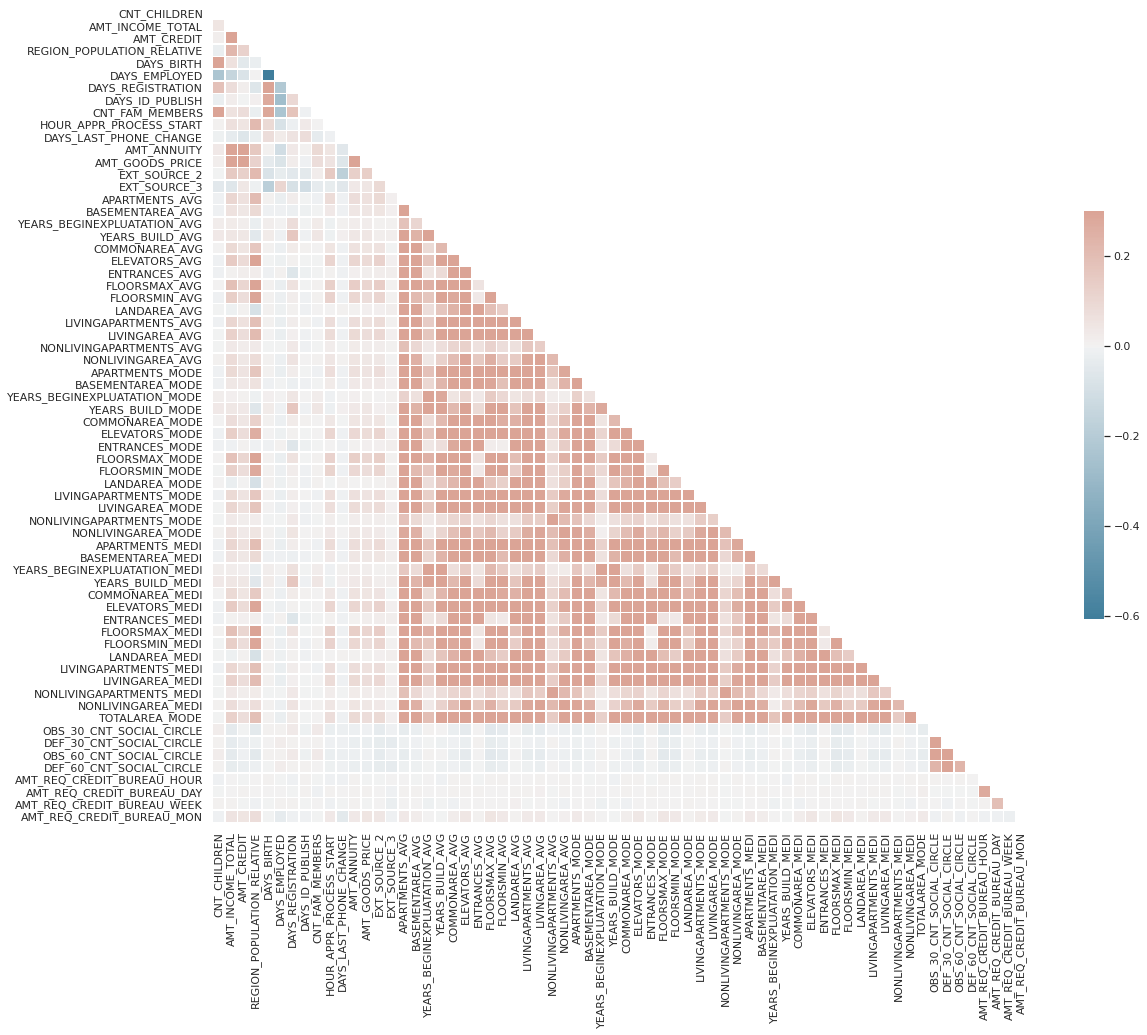

In [ ]:
sns.set_theme(style="white")

corr = df_con.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# mask=mask
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

只看蓝色的
days employed, days birth
days employed 和days registeration
days employed和days id-publish
从avg开始有正相关的关系，其他都是弱相关
但整体来看还是弱相关



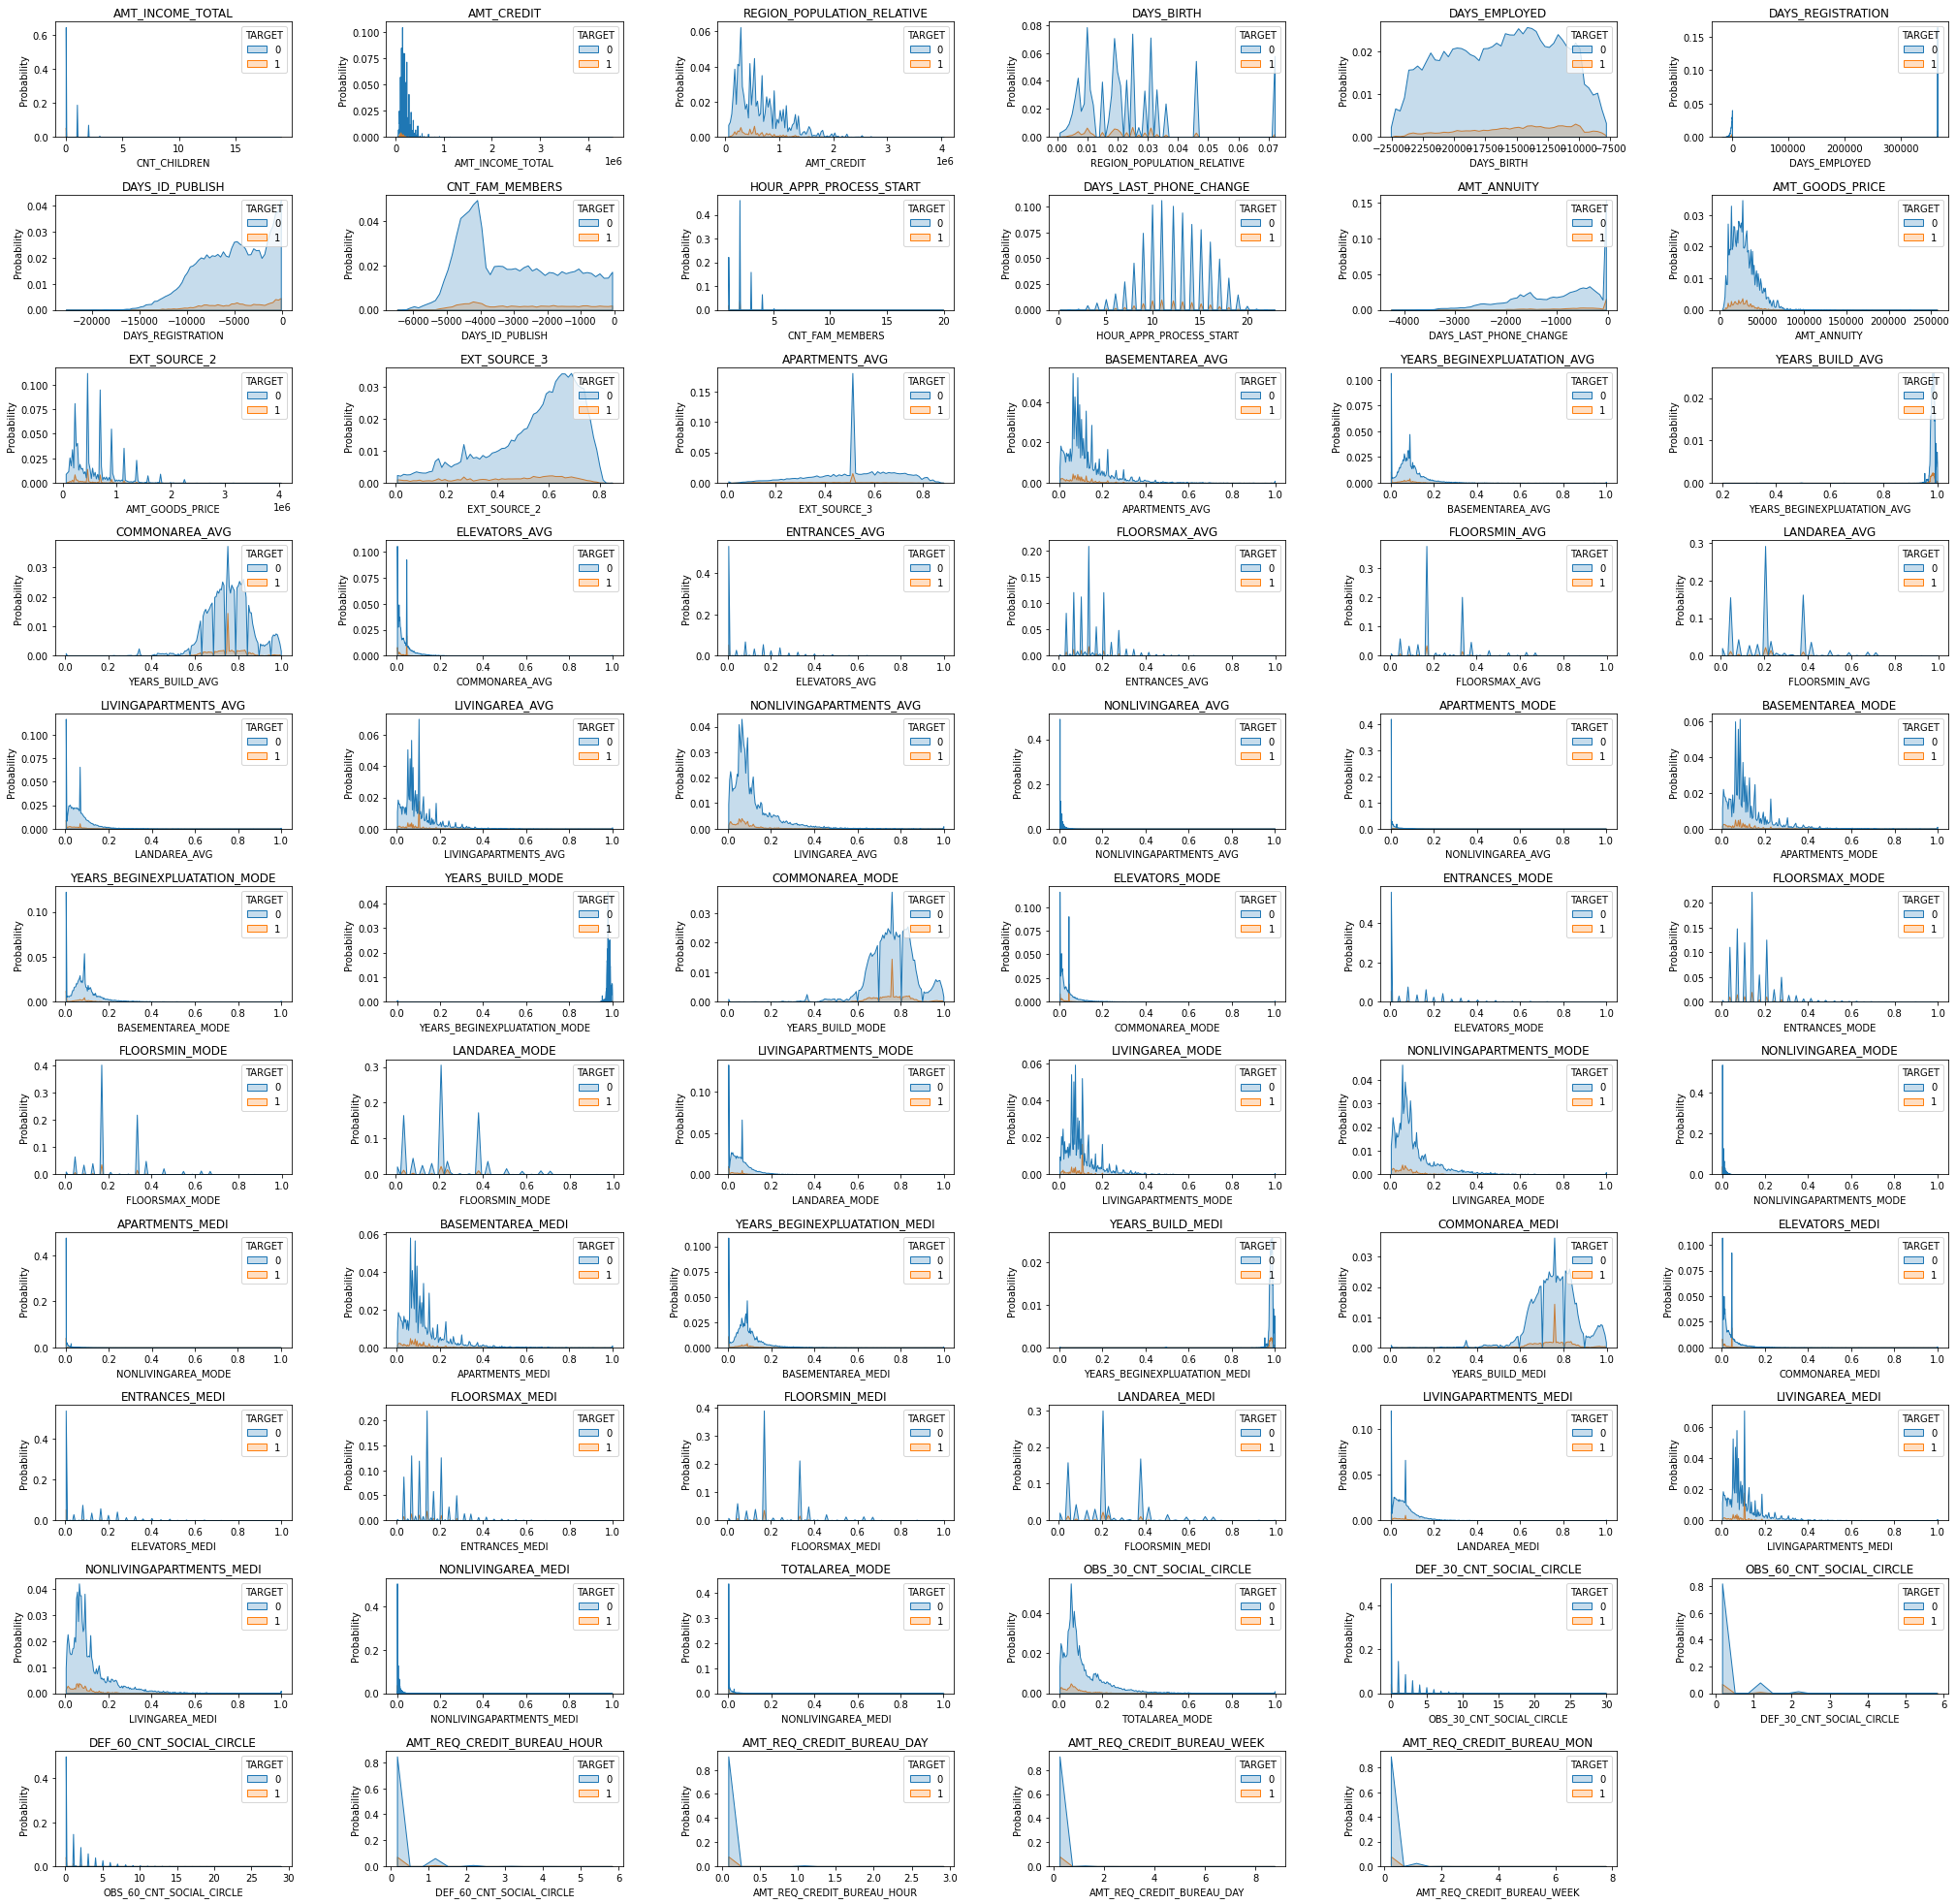

In [14]:
#target 0,1 
fig = plt.figure(figsize=(35,35))
for i in range(1,len(df_con.columns)):
  ax = fig.add_subplot(11,6,i)
  sns.histplot(data=df, x=df_con.columns[i-1], stat="probability",hue="TARGET",element="poly",common_norm="False")
  ax.set_title(df_con.columns[i])
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

some hist more concentrated

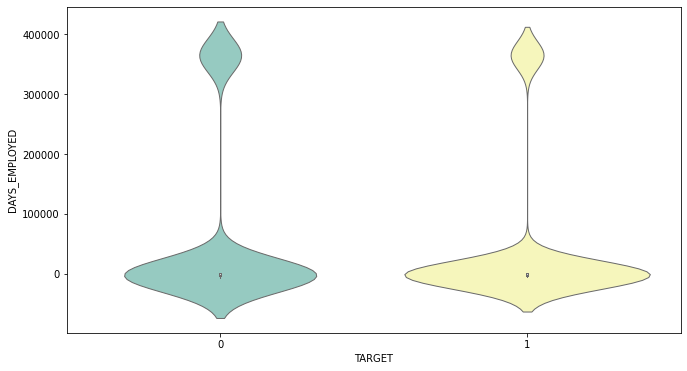

In [ ]:
f, ax = plt.subplots(figsize=(11, 6))
# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df, x="TARGET",y="DAYS_EMPLOYED",palette="Set3", bw=.2 , linewidth=1)

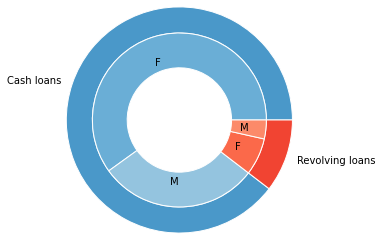

In [ ]:
#relation for "NAME_CONTRACT_TYPE" and "CODE_GENDER"
df_p=df.loc[:,["NAME_CONTRACT_TYPE","CODE_GENDER","id"]]
df_p=pd.DataFrame(df_p.groupby(["NAME_CONTRACT_TYPE","CODE_GENDER"]).agg('count').reset_index())
group_names=df_p["NAME_CONTRACT_TYPE"].unique().tolist()
group_size=df_p.groupby(["NAME_CONTRACT_TYPE"],as_index=False).agg('id').sum()['id'].tolist()
subgroup_names=df_p["CODE_GENDER"].tolist()
subgroup_size=df_p["id"].tolist()
# Create colors
a, b=[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names,colors=[a(0.6), b(0.6)],wedgeprops=dict(width=0.3, edgecolor='white'));
# # Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)],wedgeprops=dict(width=0.4, edgecolor='white'));

plt.margins(0,0);

In [ ]:
#"OCCUPATION_TYPE"
#relation for "OCCUPATION_TYPE" 
df_p=df.loc[:,["OCCUPATION_TYPE","TARGET","id"]]
df_p=pd.DataFrame(df_p.groupby(["OCCUPATION_TYPE","TARGET"]).agg('count').reset_index())
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all',"OCCUPATION_TYPE","TARGET"], 
                 values='id',
                 color='id')
fig.show()

In [ ]:
#relation for ORGANIZATION_TYPE and "TARGET"
df_p=df.loc[:,["ORGANIZATION_TYPE","TARGET","id"]]
df_p=pd.DataFrame(df_p.groupby(["ORGANIZATION_TYPE","TARGET"]).agg('count').reset_index())

In [ ]:
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all','ORGANIZATION_TYPE','TARGET'], 
                 values='id',
                 color='id')
fig.show()

In [ ]:
# NAME_FAMILY_STATUS
#relation for "CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"
df_p=df.loc[:,["CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE","id"]]
df_p=pd.DataFrame(df_p.groupby(["CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"]).agg('count').reset_index())
df_p["all"] = "all"
fig = px.treemap(df_p, path=['all',"CODE_GENDER","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"], 
                 values='id',
                 color='id')
fig.show()